# HOUSE PRICE PREDICTION

# Importing Libraries


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# machine learning model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# for evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Describing the columns:


**Price**
- Price of the house depending on the various factor the house condition.
- This is our Dependent variable.
- This is continous numerical variable.

**area**
- The land that was coverd by the house.
- This is the independent variable.
- this is continous numerical variable.

**bedrooms**
- The place where people of house used to sleep.
- This is the independent variable.
- This is the continous numerical variable.

**stories**
- The number of floors present in the house.
- This is the independent variable.
- This is the continous numerical variable.

**mainroad**
- Weather the house is connected to the main road or not.
- This is the independent variable.
- This is the categorical variable given in the yes/no.

**guestroom**
- Weather the house contain the room for the guest accomodation.
- This is the independent variable.
- This is the categorical variable given in the yes/no.
  
**basement**
- Wether the house contain the basement or not the room below the ground level.
- This is the independent variable.
- This is the categorical variable given in the yes/no.

**hotwaterheating**
- Weather the household having the hot water supply or not. which affect the cost of the house.
- This is the independent variable.
- This is the categorical variable given in the yes/no.

**airconditioning**
- Weather the household contain the airconditioning or not which might helpful in the summer.
- This is the independent variable.
- This is the categorical variable given in the yes/no.


**parking**
- The area reserved for our vehical parking.
- This is the independent variable.
- This is the categorical variable given in the yes/no.

**prefarea**
- Whether the house is in a preferred area (yes/no),
- This is the independent variable.
- This is the categorical variable.

**furnishingstatus**
- Wheater the house that we are going to buy is the furnished with the good requirnment or not.
- This is the independent variable.
- This is the categorical variable(furnished, unfurnished, semi-furnished).


  


In [4]:
df.shape

(545, 13)

- Total number of the rows are 545 and the total columns are 13

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- We can see that the total number of the rows are the 545 and non-null values are 545 means the all columns  are not null means does not contain the null values.
- We can clearly see that the there are total 7 categorical columns and 6 integer columns.


pd.options.display.float_format = '{:,.0f}'.format


In [6]:
df[['price', 'area']].describe()


,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


# Statistical Analysis

**price**
- The minimum price of the house given in our data set is 1,750,000.
- The maximum price of the house given in our data set is 13,300,000.
- 50% of the house data having the house price less than 4,340,000.

**area**
- The minimum area of the house given in our data set is 1,650.
- The maximum area of the house given in our data set is 16,200.
- 50% of the house  data having the house area less than 4,600.

In [7]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

- Not having the null values

In [8]:
df.duplicated().sum()


np.int64(0)

- We are having the zero duplicated row

# Univariate analysis

## price(target variable)

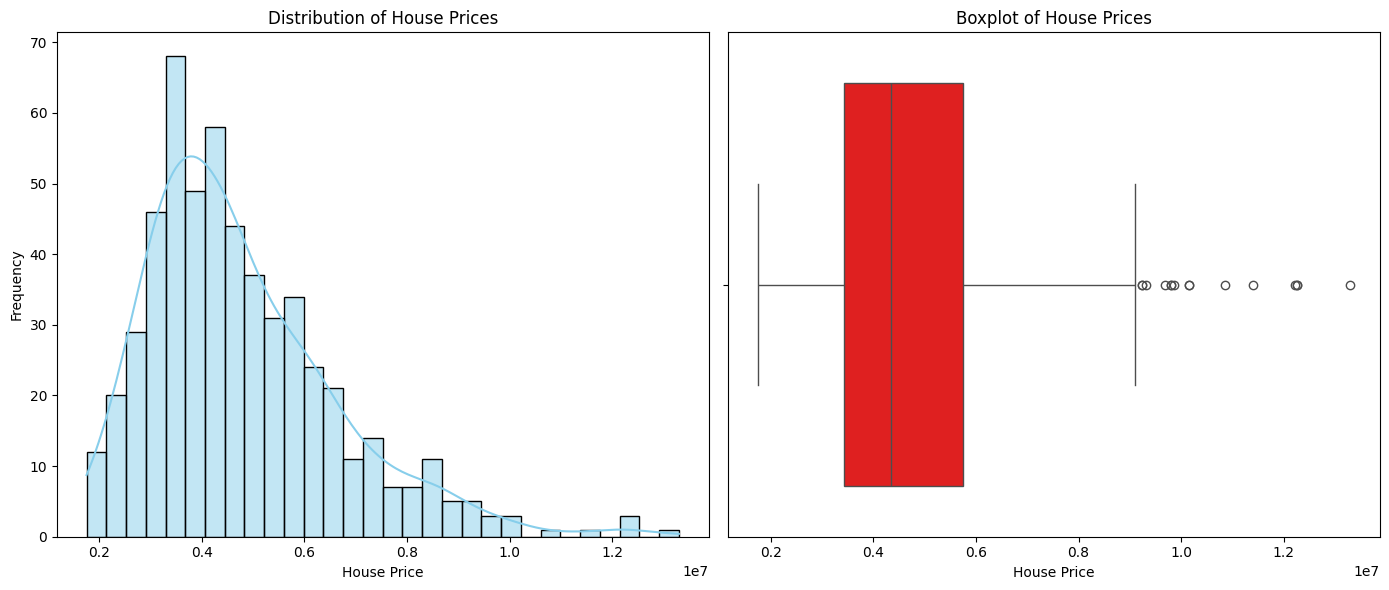

In [9]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14,6))  

# Plot Histogram on the first subplot
sns.histplot(df['price'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of House Prices')
axes[0].set_xlabel('House Price')
axes[0].set_ylabel('Frequency')

# Plot Boxplot on the second subplot
sns.boxplot(x=df['price'], ax=axes[1], color='red')
axes[1].set_title('Boxplot of House Prices')
axes[1].set_xlabel('House Price')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


- From this we can see the distribution in the 

## area

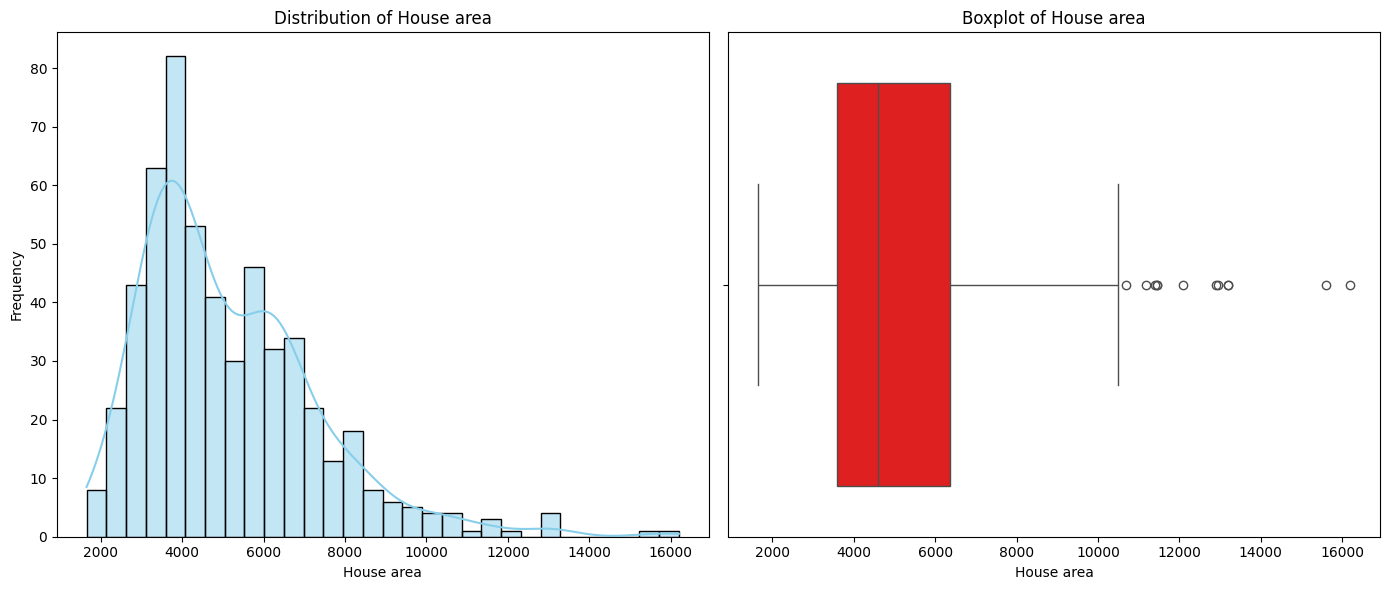

In [10]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14,6))  

# Plot Histogram on the first subplot
sns.histplot(df['area'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of House area')
axes[0].set_xlabel('House area')
axes[0].set_ylabel('Frequency')

# Plot Boxplot on the second subplot
sns.boxplot(x=df['area'], ax=axes[1], color='red')
axes[1].set_title('Boxplot of House area')
axes[1].set_xlabel('House area')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


- Given data having the so many outliers as we see in the box plot.
- But the area can be higher than the 14000.
- We are going to remove the data of the area >14000.

- From the 1st graph we can see that the most of the house area lies in the randg of the 2000-8000.
- There are few houses which having the higher carpet area.

## Removing outlier

In [11]:
df = df[df['area'] <= 14000]


In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## bed rooms

<Axes: xlabel='bedrooms', ylabel='count'>

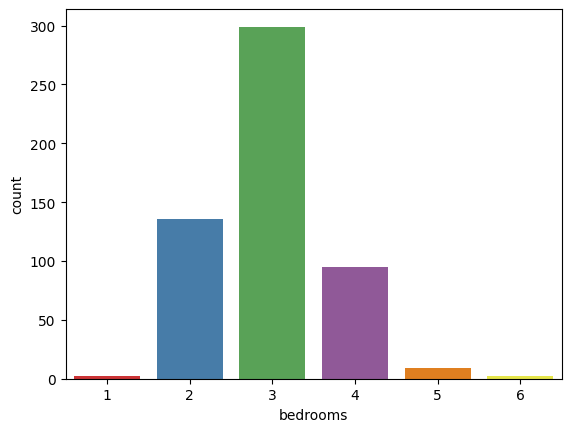

In [13]:
sns.countplot(x='bedrooms', data=df, palette='Set1')

- From this graph we can clearly see that there are 3 bed room house are more in our data set.
- The rarest house having the 1,5 and 6 bedrooms.
- Almost 300 house having 3 bed rooms.

## stories

<Axes: xlabel='stories', ylabel='count'>

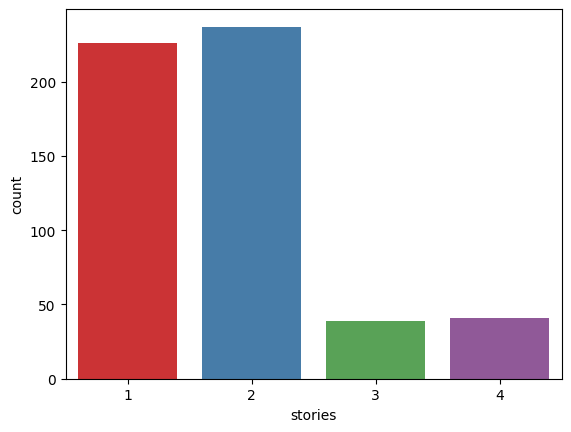

In [14]:
sns.countplot(x='stories', data=df, palette='Set1')

- 2Stories house count is almost 250+.
- 3 and 4 stories house count is almost same.

## mainroad

<Axes: xlabel='mainroad', ylabel='count'>

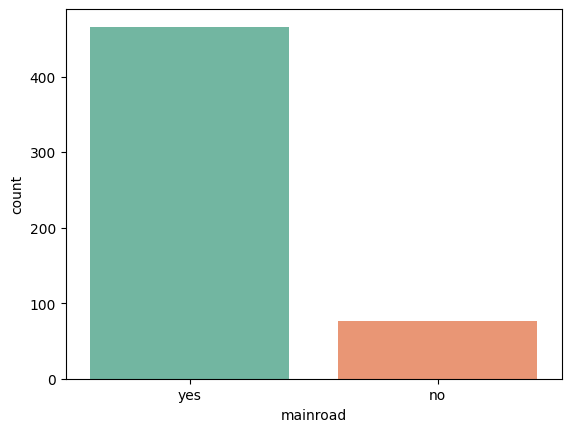

In [15]:
sns.countplot(x='mainroad', data=df, palette='Set2')

- Almost 450+ house having the connectivity to the mainroad.
- Around 90 house are not commected to the main road.

## guestroom

<Axes: xlabel='guestroom', ylabel='count'>

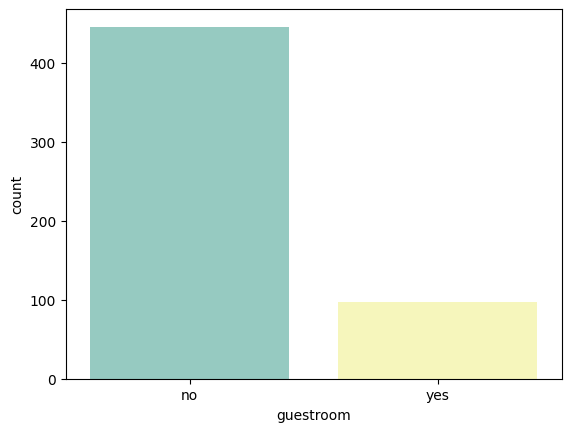

In [16]:
sns.countplot(x='guestroom', data=df, palette='Set3')

- Most of the house does not contain the guestroom.
- only 100 house contain the guest rooms.


## basement


<Axes: xlabel='basement', ylabel='count'>

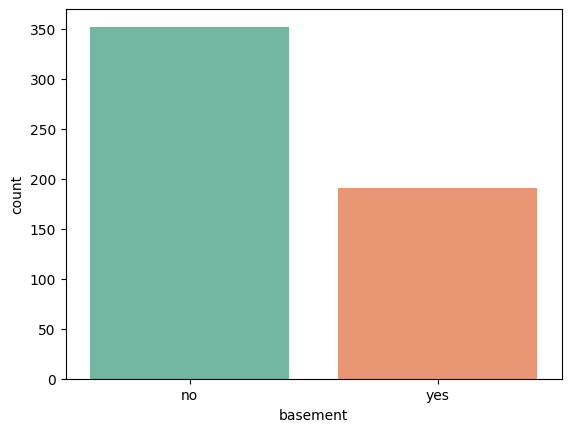

In [17]:
sns.countplot(x='basement', data=df, palette='Set2')

- 350 house does not contain the basement.
- around 200 contain the basement.

## hotwaterheating

<Axes: xlabel='hotwaterheating', ylabel='count'>

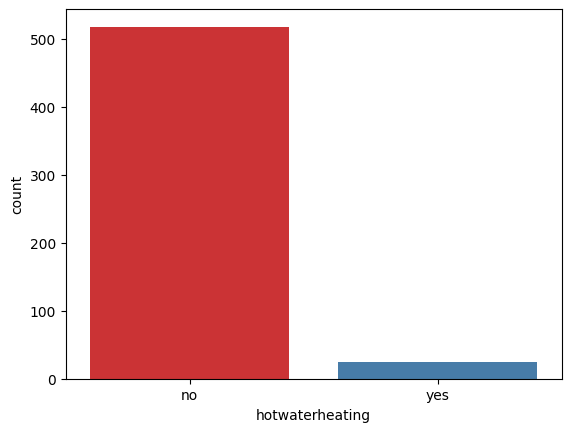

In [18]:
sns.countplot(x='hotwaterheating', data=df, palette='Set1')

- More than 500+ of the house not contain the hot water

## airconditioning

<Axes: xlabel='airconditioning', ylabel='count'>

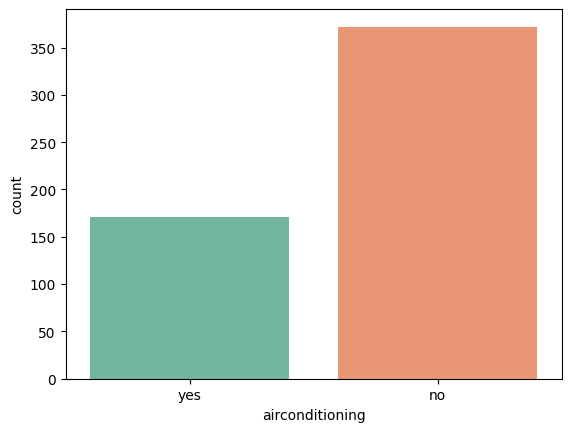

In [19]:
sns.countplot(x='airconditioning', data=df, palette='Set2')

## parking

<Axes: xlabel='parking', ylabel='count'>

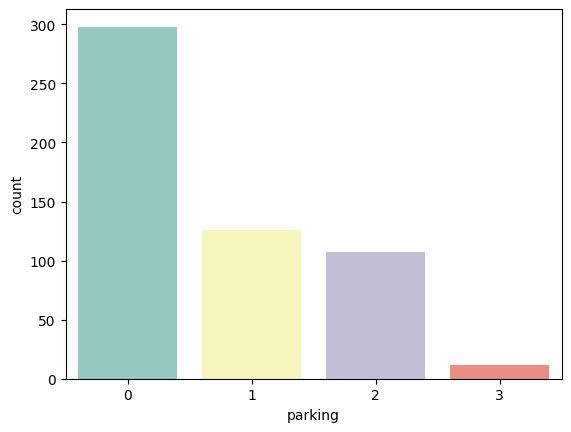

In [20]:
sns.countplot(x='parking', data=df, palette='Set3')

- Most of the house not contain the parking space.
- Around 125 house cotain the one parking space.
- 100 house contain the 2 parking spaces.
- 3 parking house are rare.

## prefarea

<Axes: xlabel='prefarea', ylabel='count'>

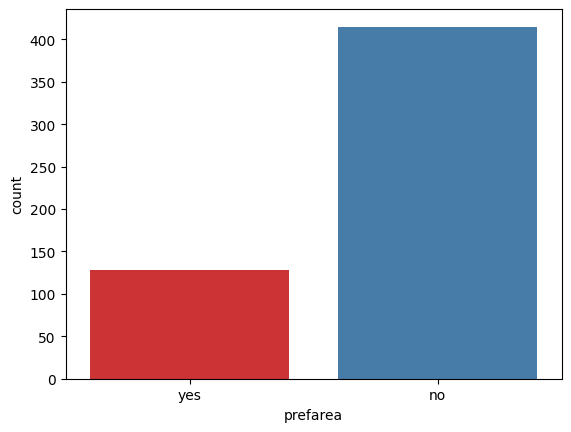

In [21]:
sns.countplot(x='prefarea', data=df, palette='Set1')

- Most of the houses are not in the prefered area.

## furnishingstatus

<Axes: xlabel='furnishingstatus', ylabel='count'>

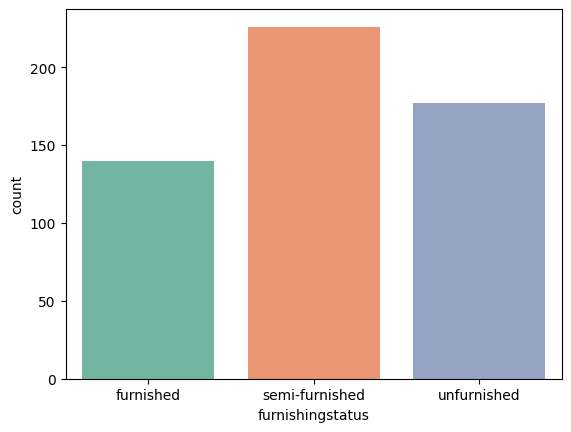

In [22]:
sns.countplot(x='furnishingstatus', data=df, palette='Set2')

- Most of the houses are semi-furninshed.
- More tha 150+ houses are unfurnished.
- Less tha 150 house are proper furninshed.

# Bivariate analysis

In [23]:
num_col=['price','area']

## Pair plot

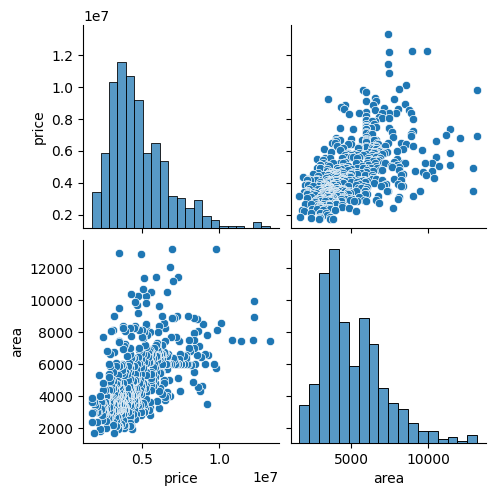

In [24]:
sns.pairplot(df[num_col]) 

- From this we can see that if the area increases than the price of the house will increase.
- Some houses also having the lower price at large area.
- Area and price are positivly correlated to each other.

## bedroom v/s stories

<Axes: xlabel='stories', ylabel='count'>

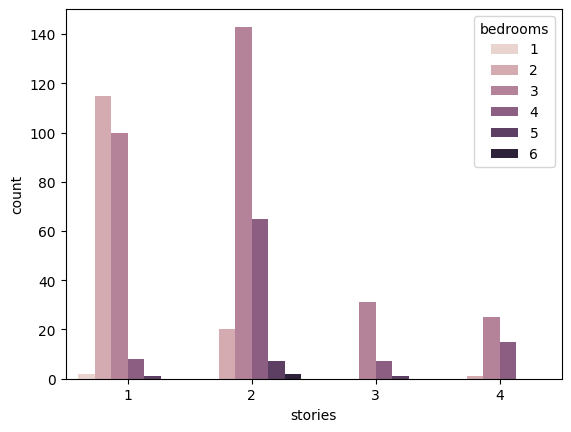

In [25]:
sns.countplot(data=df, x='stories', hue='bedrooms')

- In 1 stories house the 2bedrooms are common.
- In 2 stories house the 3bedromms are more.
- In 3 stories house we can see that house contain the 6 bedrooms.
- In 4 stories3 bedrooms are common.

<Axes: xlabel='parking', ylabel='count'>

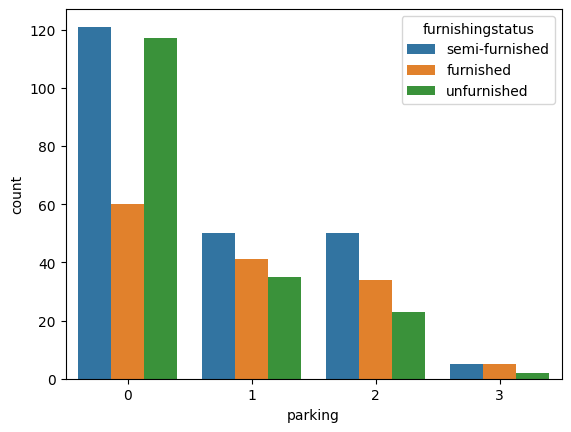

In [26]:
sns.countplot(data=df, x='parking', hue='furnishingstatus')

- We have more furninshed house in the case where parking is 0.
- If buyer wants the higher parking space than the count of the furnished house decrease as the number of parking increase.


<Axes: xlabel='parking', ylabel='area'>

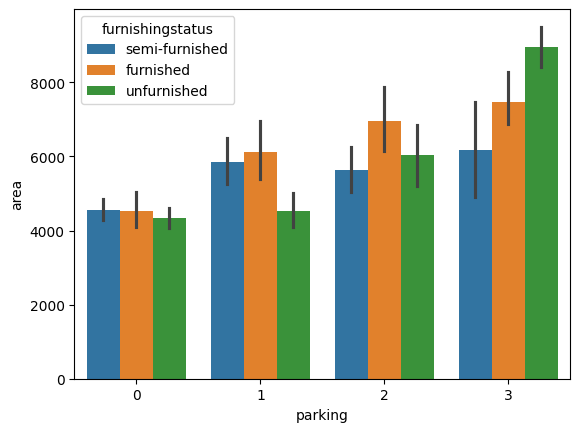

In [27]:
sns.barplot(data=df, x='parking', y='area',hue='furnishingstatus', estimator=np.mean)

- Zero parking having the all type of house in equal size.
- Where there is 1 parking then the unfurnished house area are small as compair to other.
- Where there is 2 parking then the furnished house area are large as compair to other.
- Where there is 3 parking then the unfurnished house area are large as compair to other.


In [28]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Categorical Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
cat_col = list(df.select_dtypes(include=['object', 'category']).columns)  # Convert to list
cat_col.remove('furnishingstatus')  # Now remove works


In [31]:
le=LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [32]:
furnishing_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
df['furnishingstatus'] = df['furnishingstatus'].map(furnishing_mapping)



- Make sure that the highest number is assigned to the furnished than semi-furninshed than at last unfurnished.
- Because furnished category increase the price as compair to not furnished to we have to give the higher value so tha model can understand.

In [33]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


## Heat MAP

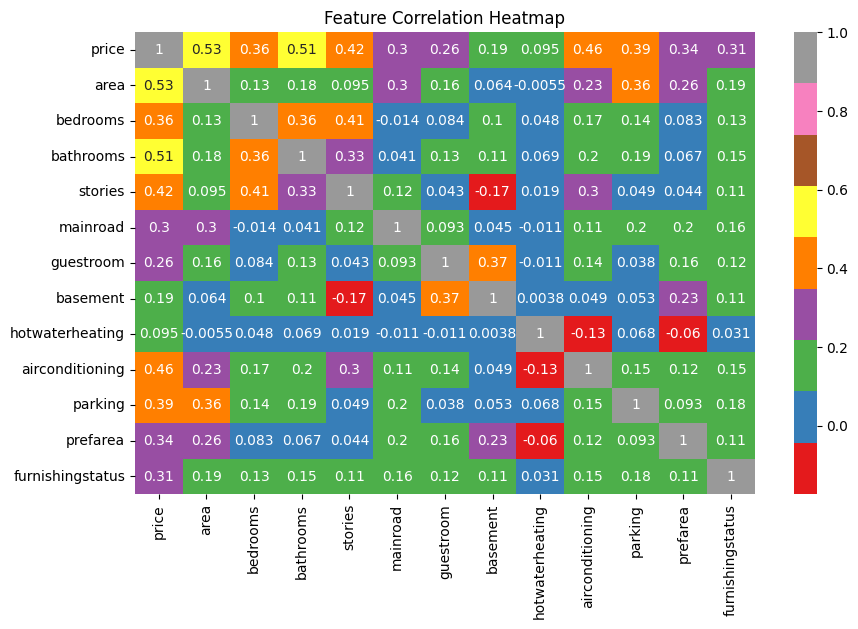

In [34]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust size for better readability
sns.heatmap(corr_matrix, annot=True,cmap="Set1")

# Show the heatmap
plt.title("Feature Correlation Heatmap")
plt.show()

- This is the heat map from this we can see that the correlation between the target valriable and the independent variable.
- From here we can see that hotwaterheating is not highly correlated with the target column so we can drop that column.
- Area and the bathrooms are the columns which show the correlation greater than 0.5 all other are below that.

# Train-Test split

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price']) 
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape, Y_train.shape)
print("Testing Data Shape:", X_test.shape, Y_test.shape)


Training Data Shape: (434, 12) (434,)
Testing Data Shape: (109, 12) (109,)


## Feature scaling

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [37]:
from sklearn.preprocessing import StandardScaler


In [38]:
scale_col=['area','bedrooms','stories','parking','furnishingstatus']
scaler = StandardScaler()
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])
X_test[scale_col] = scaler.transform(X_test[scale_col])     

# Apply Machine Learning Model

## Linear regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
LR = LinearRegression()

In [40]:
LR.fit(X_train,Y_train)
Y_train_pred_LR=LR.predict(X_train)
Y_test_pred_LR=LR.predict(X_test)


In [41]:
rmse_train_LR = (np.sqrt(mean_squared_error(Y_train, Y_train_pred_LR)))
r2_train_LR = r2_score (Y_train, Y_train_pred_LR)

rmse_test_LR = (np.sqrt(mean_squared_error(Y_test, Y_test_pred_LR)))
r2_test_LR = r2_score (Y_test, Y_test_pred_LR)

print ("RMSE for LR train:", rmse_train_LR, " R2 score for LR train:", r2_train_LR)
print ("RMSE for LR test :", rmse_test_LR, " R2 score for LR test :", r2_test_LR)


RMSE for LR train: 1007354.3222615874  R2 score for LR train: 0.6718921120225452
RMSE for LR test : 1248860.59779201  R2 score for LR test : 0.6725579821323037


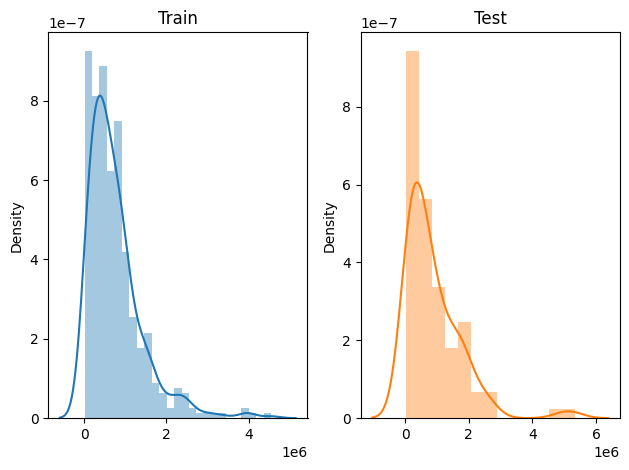

In [42]:
# Get distribution of the residuals
residual_train = np.abs(np.subtract(np.array(Y_train), np.array(Y_train_pred_LR)))
residual_test = np.abs(np.subtract(np.array(Y_test), np.array(Y_test_pred_LR)))

fig, axes=plt.subplots (1, 2)
color=sns.color_palette()

ax1=sns.distplot (residual_train, ax=axes[0], color=color[0])
ax2=sns.distplot (residual_test, ax=axes[1], color=color[1])

ax1.set_title('Train')
ax2.set_title('Test')
plt.tight_layout()
plt.show();

- WE are not seeing any overfitting in the model.
- We are getting almost equal rmse and the r2 scores.

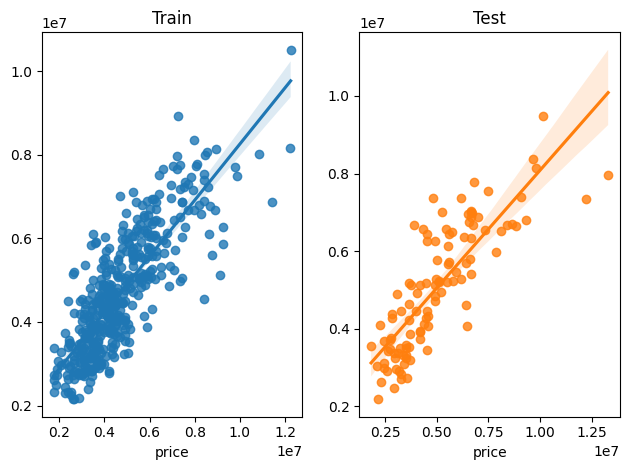

In [43]:
# Plot the target for train and test
fig, axes=plt.subplots (1,2)
ax1=sns.regplot (x=Y_train, y=Y_train_pred_LR, ax=axes[0], color=color[0])
ax2=sns.regplot (x=Y_test, y=Y_test_pred_LR, ax=axes[1], color=color[1])

ax1.set_title('Train')
ax2.set_title('Test')
plt.tight_layout()
plt.show();

- There is variance in the prediction model so we have to apply the optimization to improve the accuracy.

## lasso regression


- Lasso regression is basically used for the feature selection

In [44]:
from sklearn.linear_model import Lasso


In [45]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, Y_train)

# Predict on train & test data
Y_train_pred_lasso = lasso.predict(X_train)
Y_test_pred_lasso = lasso.predict(X_test)


In [46]:
rmse_train_lasso = (np.sqrt(mean_squared_error(Y_train, Y_train_pred_lasso)))
r2_train_lasso = r2_score (Y_train, Y_train_pred_lasso)

rmse_test_lasso = (np.sqrt(mean_squared_error(Y_test, Y_test_pred_lasso)))
r2_test_lasso = r2_score (Y_test, Y_test_pred_lasso)

print ("RMSE for lasso train:", rmse_train_lasso, " R2 score for lasso train:", r2_train_lasso)
print ("RMSE for lasso test :", rmse_test_lasso, " R2 score for lasso test :", r2_test_lasso)


RMSE for lasso train: 1007354.3222864621  R2 score for lasso train: 0.6718921120063412
RMSE for lasso test : 1248860.94614135  R2 score for lasso test : 0.6725577994630338


- With the lasso we are seeing not much difference in above model.
- Both rmse are almost same.

## Selecting feature having the high correletion graterthan 5 with target variable those are "Area" and "bathrooms"

In [47]:
from sklearn.model_selection import train_test_split
X_new = df[['area', 'bathrooms']]  # Selecting two numerical features
Y_new = df['price']  # Target variable

X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)

print("Training Data Shape:", X_new_train.shape, Y_new_train.shape)
print("Testing Data Shape:", X_new_test.shape, Y_new_test.shape)


Training Data Shape: (434, 2) (434,)
Testing Data Shape: (109, 2) (109,)


In [48]:
LR.fit(X_new_train,Y_new_train)
Y_new_train_pred_LR=LR.predict(X_new_train)
Y_new_test_pred_LR=LR.predict(X_new_test)

In [49]:
rmse_train_LR_new = (np.sqrt(mean_squared_error(Y_new_train, Y_new_train_pred_LR)))
r2_train_LR_new = r2_score (Y_new_train, Y_new_train_pred_LR)

rmse_test_LR_new = (np.sqrt(mean_squared_error(Y_new_test, Y_new_test_pred_LR)))
r2_test_LR_new = r2_score (Y_new_test, Y_new_test_pred_LR)

print ("RMSE for LR train:", rmse_train_LR_new, " R2 score for LR train:", r2_train_LR_new)
print ("RMSE for LR test :", rmse_test_LR_new, " R2 score for LR test :", r2_test_LR_new)


RMSE for LR train: 1302413.201564233  R2 score for LR train: 0.4515339597342234
RMSE for LR test : 1586528.9097141111  R2 score for LR test : 0.4715517534243391


- There are the decrease in the performance of the model so we have to take all the features.

# Decision tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
# Initialize Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)  # Adjust max_depth for tuning

dt_regressor.fit(X_train, Y_train)

Y_train_pred_dt = dt_regressor.predict(X_train)
Y_test_pred_dt = dt_regressor.predict(X_test)

# Calculate RMSE
train_rmse_dt = np.sqrt(mean_squared_error(Y_train, Y_train_pred_dt))
test_rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_test_pred_dt))

# Calculate R² Score
train_r2_dt = r2_score(Y_train, Y_train_pred_dt)
test_r2_dt = r2_score(Y_test, Y_test_pred_dt)

# Print results
print ("RMSE for dt train:", train_rmse_dt, " R2 score for dt train:", train_r2_dt)
print ("RMSE for dt test :", test_rmse_dt, " R2 score for dt test :", test_r2_dt)


RMSE for dt train: 25016.446203351134  R2 score for dt train: 0.9997976499146092
RMSE for dt test : 1758973.0231957156  R2 score for dt test : 0.35043167596819147


- As we seen that the decision tree always overfits.
- Giving the good accuracy in the trainig data and the bad results in the test data set.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
# param_grid = {
#     'max_depth': [3, 5, 7,6,4],  
#     'min_samples_split': [2, 5, 4,6],  
#     'min_samples_leaf': [1, 2, 4, 6],  
#     'criterion': ['squared_error'] 
# }
param_grid = {'max_leaf_nodes': list(range(0, 10)), 
               'min_samples_split': [0,1,2, 3,5,6, 4], 
               'min_samples_leaf': [0,1,2, 3, 8,6,5], 
               'max_depth':[0,1,2,3,4,6,7],
               'max_features':[0,1,2,3,4,5,8,9],
              'max_leaf_nodes':[0,1,4,5],
                "splitter":["best"]}

grid_search_dt = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, Y_train)

best_params_dt= grid_search_dt.best_params_
print("Best Parameters:", best_params_dt)


Best Parameters: {'max_depth': 3, 'max_features': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [54]:
best_dt = DecisionTreeRegressor(**best_params_dt, random_state=42)
best_dt.fit(X_train, Y_train)


DecisionTreeRegressor(max_depth=3, max_features=2, max_leaf_nodes=5,
                      random_state=42)

In [55]:
Y_train_pred_best_dt = best_dt.predict(X_train)
Y_test_pred_best_dt = best_dt.predict(X_test)

In [56]:
# Calculate RMSE
train_rmse_best_dt = np.sqrt(mean_squared_error(Y_train, Y_train_pred_best_dt))
test_rmse_best_dt = np.sqrt(mean_squared_error(Y_test, Y_test_pred_best_dt))

# Calculate R² Score
train_r2_best_dt = r2_score(Y_train, Y_train_pred_best_dt)
test_r2_best_dt = r2_score(Y_test, Y_test_pred_best_dt)

In [57]:
print ("RMSE for dt train:", train_rmse_best_dt, " R2 score for dt train:", train_r2_best_dt)
print ("RMSE for dt test :", test_rmse_best_dt, " R2 score for dt test :", test_r2_best_dt)


RMSE for dt train: 1279331.1539054613  R2 score for dt train: 0.47080209704083387
RMSE for dt test : 1615670.7218699036  R2 score for dt test : 0.4519600842588476


In [58]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

[Text(0.375, 0.875, 'x[4] <= 0.5\nsquared_error = 3092771517424.871\nsamples = 434\nvalue = 4682289.032'),
 Text(0.25, 0.625, 'squared_error = 763520850061.726\nsamples = 63\nvalue = 3398827.778'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 0.225\nsquared_error = 3161078512987.188\nsamples = 371\nvalue = 4900235.283'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[11] <= -0.537\nsquared_error = 1567378324237.211\nsamples = 215\nvalue = 4120690.0'),
 Text(0.125, 0.125, 'squared_error = 1262984943672.842\nsamples = 72\nvalue = 3535972.222'),
 Text(0.375, 0.125, 'squared_error = 1461823114169.152\nsamples = 143\nvalue = 4415093.357'),
 Text(0.75, 0.375, 'x[2] <= 1.5\nsquared_error = 3365723640282.625\nsamples = 156\nvalue = 5974608.59'),
 Text(0.625, 0.125, 'squared_error = 2285734965352.328\nsamples = 97\nvalue = 5177871.134'),
 Text(0.875, 0.125, 'squared_error = 2381846659721.0\nsamples = 59\nvalue = 7284498.983')]

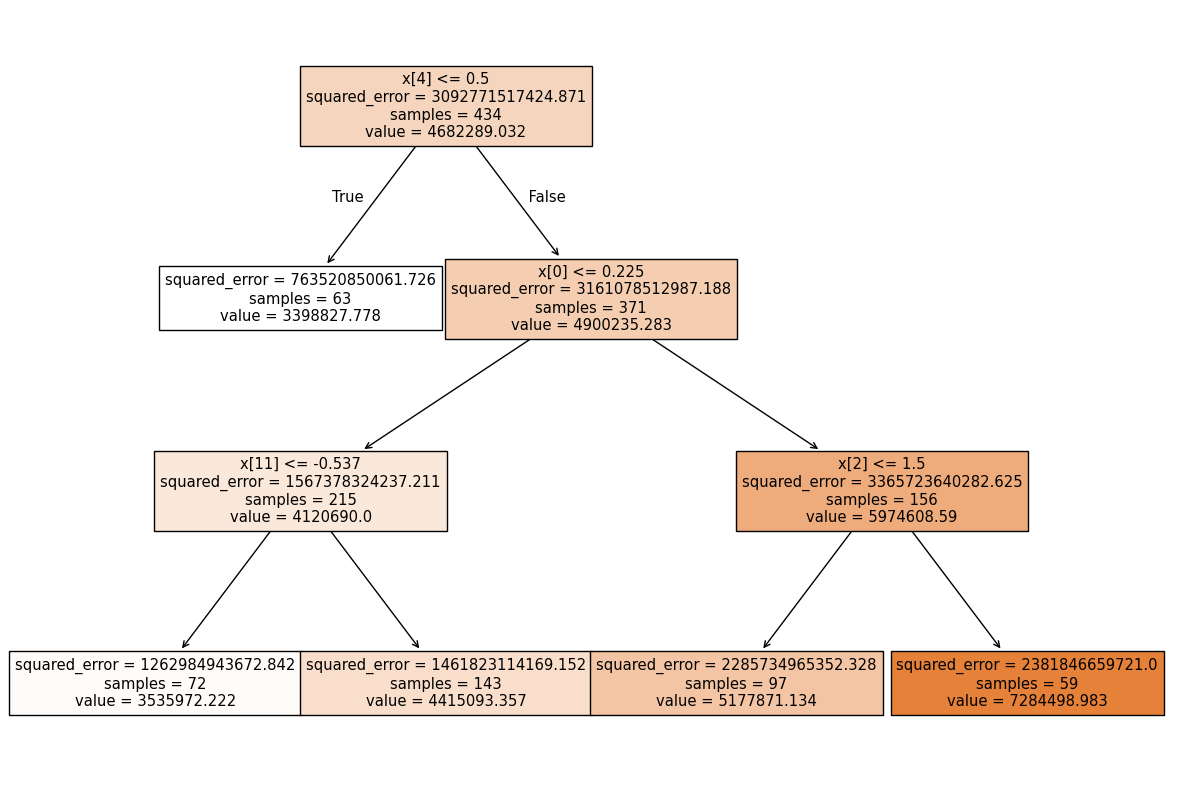

In [59]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_dt,filled=True)

## Random forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
Rand_for=RandomForestRegressor(random_state=42,n_estimators= 10)

In [61]:
param_rand= {'n_estimators':[100,90,80,70],
    
    'criterion':['gini'],
    'max_depth':[2,3,4,5],
    'min_samples_split':[2,4,5,6,3],
    'min_samples_leaf':[1,2,3,4],
    'max_leaf_nodes':[2],
    'criterion': ['squared_error', 'absolute_error']
    
    }
grid_search_rand = GridSearchCV(Rand_for, param_rand, cv=5,n_jobs=-1)
grid_search_rand.fit(X_train, Y_train)

best_params_rand= grid_search_rand.best_params_
print("Best Parameters randomforest:", best_params_rand)

best_rand = RandomForestRegressor(**best_params_rand, random_state=42)
best_rand.fit(X_train, Y_train)



Best Parameters randomforest: {'criterion': 'squared_error', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_depth=2, max_leaf_nodes=2, random_state=42)

In [62]:
Y_train_pred_rand = best_rand.predict(X_train)
Y_test_pred_rand = best_rand.predict(X_test)

In [63]:
train_rmse_rand = np.sqrt(mean_squared_error(Y_train, Y_train_pred_rand))
test_rmse_rand = np.sqrt(mean_squared_error(Y_test, Y_test_pred_rand))

# Calculate R² Score
train_r2_rand = r2_score(Y_train, Y_train_pred_rand)
test_r2_rand = r2_score(Y_test, Y_test_pred_rand)

In [64]:
print ("RMSE for random forest train:", train_rmse_rand, " R2 score for random forest train:", train_r2_rand)
print ("RMSE for random forest test :", test_rmse_rand, " R2 score for random forest test :", test_r2_rand)


RMSE for random forest train: 1387867.8310842384  R2 score for random forest train: 0.37720031832087675
RMSE for random forest test : 1754013.650351912  R2 score for random forest test : 0.35408938995238803


## XGBoost

In [65]:
!pip install xgboost


In [66]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [67]:
param_grid_xgb = {
    'max_depth': [2,3, 4,5,6],
    'learning_rate': [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],           
    "min_child_weight": [1, 3, 5]
}


grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,  
    n_jobs=-1  
)
grid_search_xgb.fit(X_train,Y_train)



best_params_xgb= grid_search_xgb.best_params_
print("Best Parameters randomforest:", best_params_xgb)

best_xgb = XGBRegressor(**best_params_xgb, random_state=42)
best_xgb.fit(X_train, Y_train)


Best Parameters randomforest: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
Y_train_pred_xgb = best_xgb.predict(X_train)
Y_test_pred_xgb = best_xgb.predict(X_test)

In [69]:
train_rmse_xgb = np.sqrt(mean_squared_error(Y_train, Y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(Y_test, Y_test_pred_xgb))

# Calculate R² Score
train_r2_xgb = r2_score(Y_train, Y_train_pred_xgb)
test_r2_xgb = r2_score(Y_test, Y_test_pred_xgb)

In [70]:
print ("RMSE for random forest train:", train_rmse_xgb, " R2 score for random forest train:", train_r2_xgb)
print ("RMSE for random forest test :", test_rmse_xgb, " R2 score for random forest test :", test_r2_xgb)


RMSE for random forest train: 1209739.6406169387  R2 score for random forest train: 0.526809573173523
RMSE for random forest test : 1633328.31025731  R2 score for random forest test : 0.43991565704345703


# Compairing different model

In [71]:

print("FEATURE SELECTION")
print ("RMSE for LR train:", rmse_train_LR_new, " R2 score for LR train:", r2_train_LR_new)
print ("RMSE for LR test :", rmse_test_LR_new, " R2 score for LR test :", r2_test_LR_new)
print("---------------------------------------------------------------------------------------------------------------")


print("LINEAR REGRESSION")
print ("RMSE for LR train:", rmse_train_LR, " R2 score for LR train:", r2_train_LR)
print ("RMSE for LR test :", rmse_test_LR, " R2 score for LR test :", r2_test_LR)

print("---------------------------------------------------------------------------------------------------------------")

print("LASSO REGRESSION")
print ("RMSE for lasso train:", rmse_train_lasso, " R2 score for lasso train:", r2_train_lasso)
print ("RMSE for lasso test :", rmse_test_lasso, " R2 score for lasso test :", r2_test_lasso)
print("---------------------------------------------------------------------------------------------------------------")

print("DECISION TREE")
print ("RMSE for dt train:", train_rmse_best_dt, " R2 score for dt train:", train_r2_best_dt)
print ("RMSE for dt test :", test_rmse_best_dt, " R2 score for dt test :", test_r2_best_dt)
print("---------------------------------------------------------------------------------------------------------------")

print("RANDOM FORESET")
print ("RMSE for random forest train:", train_rmse_rand, " R2 score for random forest train:", train_r2_rand)
print ("RMSE for random forest test :", test_rmse_rand, " R2 score for random forest test :", test_r2_rand)
print("---------------------------------------------------------------------------------------------------------------")

print("XGBOOST")
print ("RMSE for xgboost train:", train_rmse_xgb, " R2 score for xgboost train:", train_r2_xgb)
print ("RMSE for xgboost test :", test_rmse_xgb, " R2 score for xgboost test :", test_r2_xgb)
print("---------------------------------------------------------------------------------------------------------------")




FEATURE SELECTION
RMSE for LR train: 1302413.201564233  R2 score for LR train: 0.4515339597342234
RMSE for LR test : 1586528.9097141111  R2 score for LR test : 0.4715517534243391
---------------------------------------------------------------------------------------------------------------
LINEAR REGRESSION
RMSE for LR train: 1007354.3222615874  R2 score for LR train: 0.6718921120225452
RMSE for LR test : 1248860.59779201  R2 score for LR test : 0.6725579821323037
---------------------------------------------------------------------------------------------------------------
LASSO REGRESSION
RMSE for lasso train: 1007354.3222864621  R2 score for lasso train: 0.6718921120063412
RMSE for lasso test : 1248860.94614135  R2 score for lasso test : 0.6725577994630338
---------------------------------------------------------------------------------------------------------------
DECISION TREE
RMSE for dt train: 1279331.1539054613  R2 score for dt train: 0.47080209704083387
RMSE for dt test : 161

# Saving the best model 

In [73]:
import pickle

In [74]:
with open('linear_regression.pkl', 'wb') as f:
    pickle.dump(LR, f)


# Conclusion

- From these we can see that the best model is linear regression model which given the god result among all.
- when the relationship between features and target variable is truly linear and the data is relatively clean with minimal non-linear patterns; in such cases, the simplicity of linear regression can be advantageous.
- And our data is simple and clean.